# cifar10 辨識

## 步驟1：載入 cifar10 資料

In [21]:
import tensorflow as tf
cifar10 = tf.keras.datasets.cifar10

# 載入 cifar10 資料
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

# 訓練/測試資料的 X/y 維度
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


## 步驟2：資料探索(EDA)

In [22]:
# label 名稱
labels_mapping = [ "airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck" ]

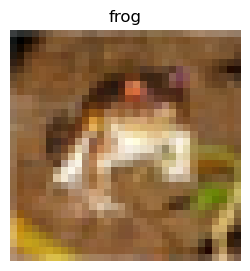

In [24]:
# 單圖
import matplotlib.pyplot as plt

plt.figure(figsize=(3,3))
plt.imshow(x_train[0], cmap='gray')
plt.title(labels_mapping[y_train[0, 0]])
plt.axis('off');

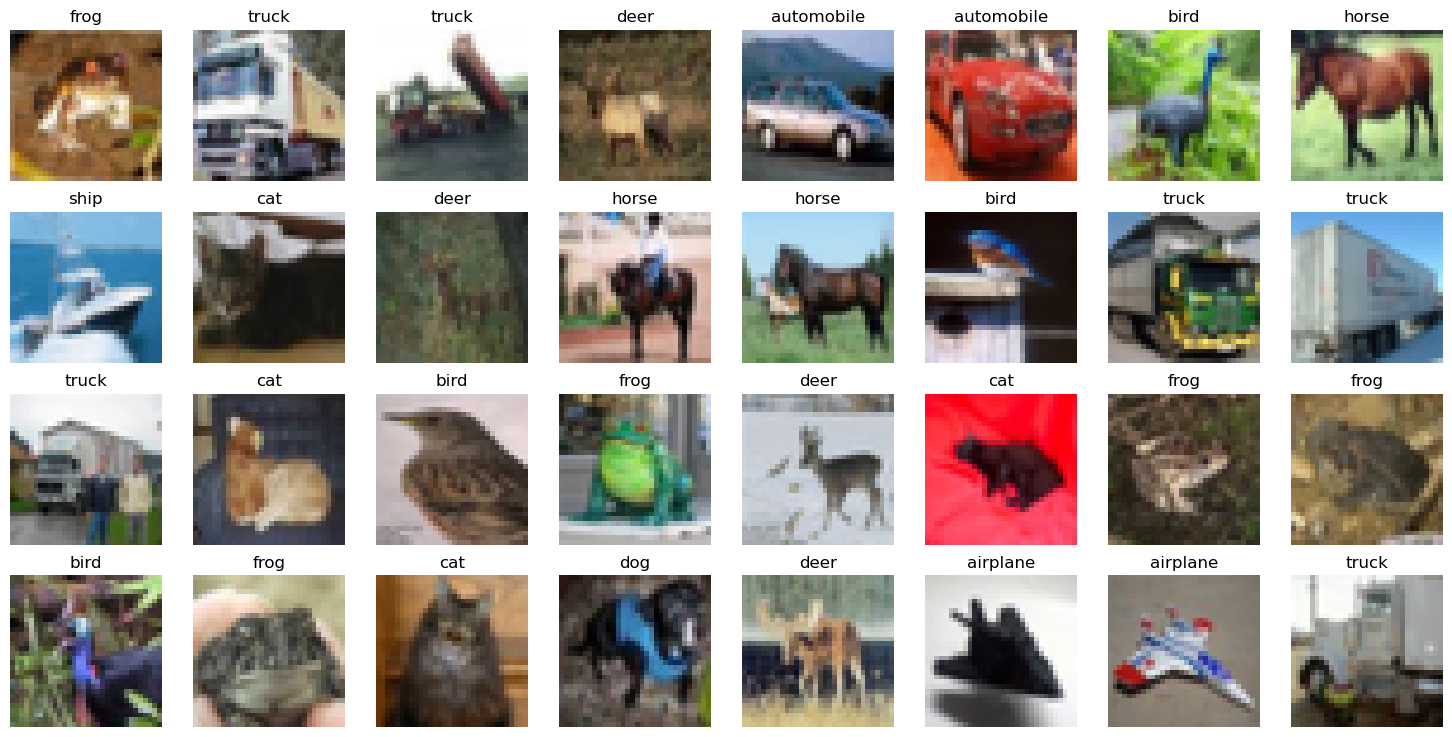

In [25]:
# 多圖
fig = plt.figure(0)
fig.set_size_inches(18.5, 18.5)
for i in range(0,32):
    fig.add_subplot(8, 8, i+1)
    plt.imshow(x_train[i])
    plt.title(labels_mapping[y_train[i, 0]])
    plt.axis('off')

## 轉成單色

In [2]:
# 轉成單色：rgb_to_grayscale
x_train = tf.image.rgb_to_grayscale(x_train)
x_test = tf.image.rgb_to_grayscale(x_test)
print(x_train.shape, x_test.shape)

(50000, 32, 32, 1) (10000, 32, 32, 1)


## 步驟3：進行特徵工程，將特徵縮放成(0, 1)之間

In [3]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
x_train_norm, x_test_norm = x_train / 255, x_test / 255

In [4]:
# 確認轉換成功
x_train_norm[0]

<tf.Tensor: shape=(32, 32, 1), dtype=float32, numpy=
array([[[0.23921569],
        [0.1764706 ],
        [0.1882353 ],
        ...,
        [0.5372549 ],
        [0.50980395],
        [0.5058824 ]],

       [[0.07058824],
        [0.        ],
        [0.03921569],
        ...,
        [0.36862746],
        [0.3529412 ],
        [0.36862746]],

       [[0.09411765],
        [0.03137255],
        [0.12156863],
        ...,
        [0.3529412 ],
        [0.35686275],
        [0.3137255 ]],

       ...,

       [[0.6784314 ],
        [0.6039216 ],
        [0.6117647 ],
        ...,
        [0.5254902 ],
        [0.13725491],
        [0.14901961]],

       [[0.57254905],
        [0.5019608 ],
        [0.56078434],
        ...,
        [0.59607846],
        [0.27058825],
        [0.23137255]],

       [[0.5882353 ],
        [0.53333336],
        [0.5764706 ],
        ...,
        [0.7372549 ],
        [0.4862745 ],
        [0.3882353 ]]], dtype=float32)>

## 步驟4：資料分割，此步驟無需進行，載入資料時，已經切割好了

## 步驟5：建立模型結構

## 步驟6：結合訓練資料及模型，進行模型訓練

## 步驟7：評分(Score Model)

In [14]:
# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(x_train_norm.shape[1:]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1939 - loss: 2.1781 - val_accuracy: 0.2836 - val_loss: 2.0130
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2635 - loss: 2.0271 - val_accuracy: 0.2832 - val_loss: 1.9908
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2836 - loss: 1.9895 - val_accuracy: 0.3065 - val_loss: 1.9487
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2891 - loss: 1.9723 - val_accuracy: 0.3183 - val_loss: 1.9007
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2916 - loss: 1.9631 - val_accuracy: 0.3272 - val_loss: 1.9077
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2976 - loss: 1.9405 - val_accuracy: 0.3252 - val_loss: 1.9009
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3056 - loss: 1.9302 - val_accuracy: 0.3326 - val_loss: 1.8652
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.3046 - loss: 1.9198 - 

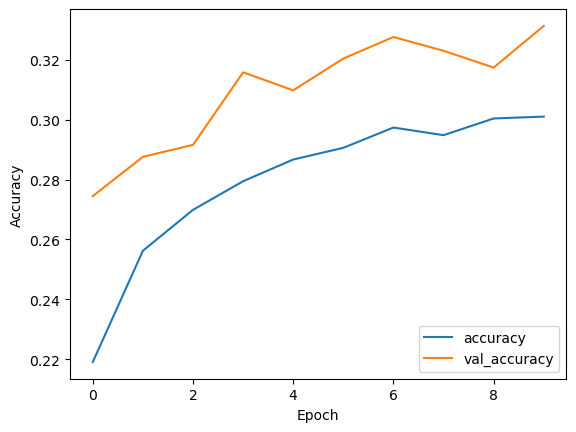

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [9]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 397,472 (1.52 MB)

 Trainable params: 132,490 (517.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264,982 (1.01 MB)

In [12]:
x_train_norm.shape

TensorShape([50000, 32, 32, 1])

## CNN

In [15]:
# 建立模型
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(x_train_norm.shape[1:]),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(64, activation='relu'),    
    tf.keras.layers.Dense(10, activation='softmax')    
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# 模型訓練
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

# 評分(Score Model)
score=model.evaluate(x_test_norm, y_test, verbose=0)

for i, x in enumerate(score):
    print(f'{model.metrics_names[i]}: {score[i]:.4f}')

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2819 - loss: 1.9342 - val_accuracy: 0.4917 - val_loss: 1.4440
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5103 - loss: 1.3977 - val_accuracy: 0.5545 - val_loss: 1.2902
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.5888 - loss: 1.1703 - val_accuracy: 0.6081 - val_loss: 1.1129
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6336 - loss: 1.0582 - val_accuracy: 0.6260 - val_loss: 1.0643
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6663 - loss: 0.9614 - val_accuracy: 0.6545 - val_loss: 1.0065
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6940 - loss: 0.8882 - val_accuracy: 0.6716 - val_loss: 0.9616
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7134 - loss: 0.8319 - val_accuracy: 0.6613 - val_loss: 0.9924
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7300 - loss: 0.7833 - 

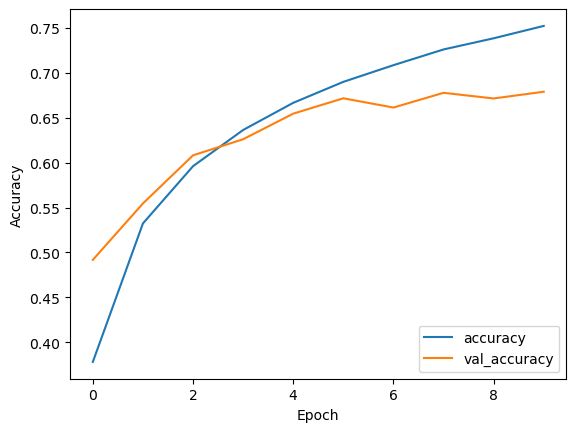

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')